In [ ]:
import pandas as pd
 
import numpy as np

In [ ]:
trans=pd.read_csv('txt.csv')

In [ ]:
trans=trans.drop('Unnamed: 0',axis=1)
trans.head()

,new,rev_en
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,recebi bem antes do prazo estipulado.,I received it well before the deadline.
4,parabéns lojas lannister adorei comprar pela i...,congratulations lannister stores loved shoppin...


In [ ]:
trans.shape

(100000, 2)

In [ ]:
rev=pd.read_csv('olist_order_reviews_dataset.csv')

In [ ]:
rev.shape

(100000, 7)

In [ ]:
trans=pd.DataFrame(trans)

In [ ]:
rev=pd.DataFrame(rev)

In [ ]:
rev1=pd.concat([rev,trans],axis=1)

In [ ]:
rev1.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,new,rev_en
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,NaN,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,NaN,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,NaN,NaN
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,recebi bem antes do prazo estipulado.,I received it well before the deadline.
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,parabéns lojas lannister adorei comprar pela i...,congratulations lannister stores loved shoppin...


In [ ]:
reviews=rev1[['review_id','order_id','review_score','rev_en']]
reviews.head()

,review_id,order_id,review_score,rev_en
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,I received it well before the deadline.
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,congratulations lannister stores loved shoppin...


In [ ]:
reviews.shape

(100000, 4)

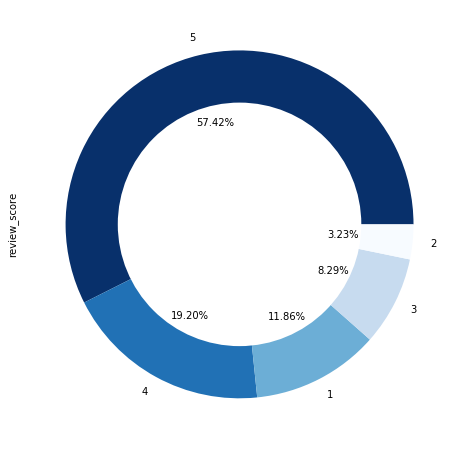

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
reviews.review_score.value_counts().plot(kind='pie',autopct='%1.2f%%',pctdistance=.6,cmap='Blues_r')
#plt.xlabel('Top 10 cities on the basis of customer count', size=14)
centre_circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf() #gcf=get current figure
fig.gca().add_artist(centre_circle)
plt.show()

In [ ]:
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
reviews['score']=reviews['review_score'].apply(lambda x: 0 if x==1 or x==2 else 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
reviews.head()

,review_id,order_id,review_score,rev_en,score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,1
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,1
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,1
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,I received it well before the deadline.,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,congratulations lannister stores loved shoppin...,1


In [ ]:
reviews['score'].value_counts()

1    84907
0    15093
Name: score, dtype: int64

In [ ]:
review1=reviews.dropna(axis=0)

In [ ]:
review1

,review_id,order_id,review_score,rev_en,score
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,I received it well before the deadline.,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,congratulations lannister stores loved shoppin...,1
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,efficient device. on the website the brand of ...,1
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"but a little, locking ... for the good value.",1
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"reliable seller, ok product and delivery ahead...",1
...,...,...,...,...,...
99983,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,delivered on time. the product arrived in perf...,1
99990,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,"the product was not sent with nf, there is no ...",1
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"excellent backpack, super fast delivery. super...",1
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,I requested the purchase of a Celtic / Prism /...,0


In [ ]:
review1['score'].value_counts()

1    30318
0    11407
Name: score, dtype: int64

In [ ]:
neg_rev=review1[review1['score']==0]

In [ ]:
neg_rev

,review_id,order_id,review_score,rev_en,score
16,9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,"I would like to know what happened, I always r...",0
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,terrible,0
29,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,did not like ! I bought a pig in a poke,0
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,I always buy online and delivery takes place b...,0
39,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,nothing to get my order.,0
...,...,...,...,...,...
99944,3450ec3bbabeb09a08b00fc72da87a30,c46f950813dd2dd9bab4188dceb83175,1,"good afternoon. I don't get all the products,...",0
99975,2ee221b28e5b6fceffac59487ed39348,f2d12dd37eaef72ed7b1186b2edefbcd,2,very different photo mainly the very thin synt...,0
99978,5085bc489aa6b58a29c4f922d59ff826,18ed848509774f56cc8c1c0a1903ad7f,2,I had a delivery problem where the mail was po...,0
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,I requested the purchase of a Celtic / Prism /...,0


In [ ]:
rev_combined=' '.join(neg_rev.rev_en.values)

In [ ]:
#rev_combined

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
all_terms = word_tokenize(rev_combined.lower())
print(all_terms[:20])

['i', 'would', 'like', 'to', 'know', 'what', 'happened', ',', 'i', 'always', 'received', 'and', 'this', 'purchase', 'now', 'disappointed', 'me', 'terrible', 'did', 'not']


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_nltk = stopwords.words("english")

In [ ]:
neg=[ 'no', 'nor', 'not',"aren't","couldn't", "didn't", "doesn't", "hadn't","hasn't","haven't","isn't", "mightn't",\
     "needn't","shouldn't", "wasn't", "weren't","wouldn't"]

In [ ]:
stop_n=[word for word in stop_nltk if word not in neg ]
print(stop_n)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [ ]:
reviews_updated1 = [term for term in all_terms \
                    if term not in stop_n \
and term not in list(punctuation) and len(term)>2]

In [ ]:
#reviews_updated1

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
reviews_updated_lemm = [ lemm.lemmatize(word) for word in reviews_updated1]

In [ ]:
def  clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [lemm.lemmatize(term) for term in tokens 
               if term not in stop_n+['product'] and
               term not in list(punctuation) and len(term) > 2] 
    res = " ".join(stemmed)
    return res

In [ ]:
neg_rev['clean_review'] = neg_rev.rev_en.apply(clean_txt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
neg_rev.head()

,review_id,order_id,review_score,rev_en,score,clean_review
16,9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,"I would like to know what happened, I always r...",0,would like know happened always received purch...
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,terrible,0,terrible
29,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,did not like ! I bought a pig in a poke,0,not like bought pig poke
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,I always buy online and delivery takes place b...,0,always buy online delivery take place agreed d...
39,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,nothing to get my order.,0,nothing get order


In [ ]:
reviews_combined = " ".join(neg_rev.clean_review.values)

In [ ]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined)

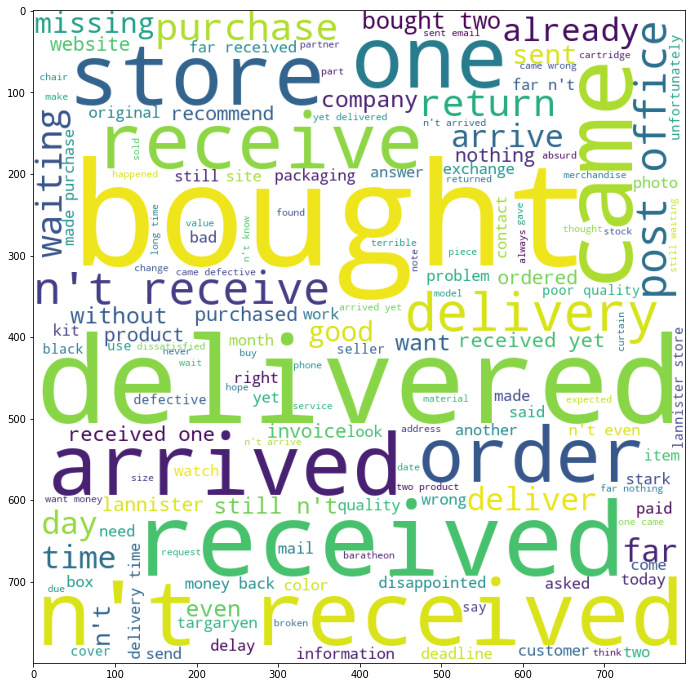

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12,12])
plt.imshow(word_cloud)
plt.show()

In [ ]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [ ]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

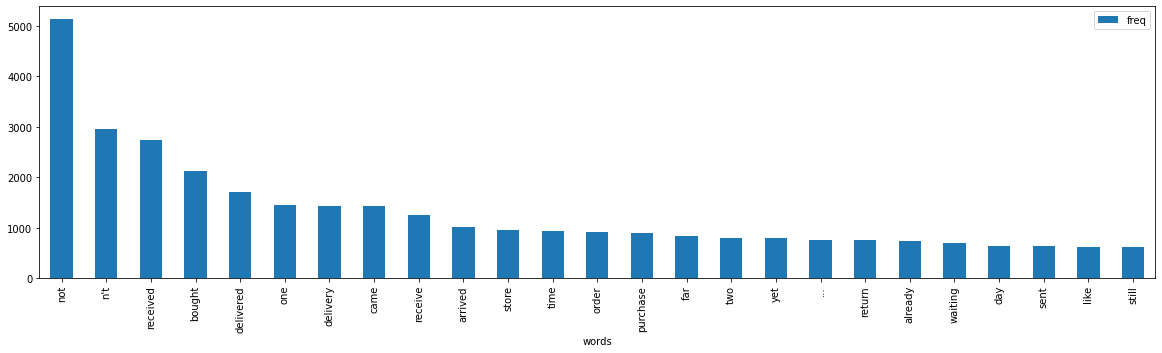

In [ ]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

In [ ]:
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2))

In [ ]:
X_bigram = bigram_count_vectorizer.fit_transform(neg_rev['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

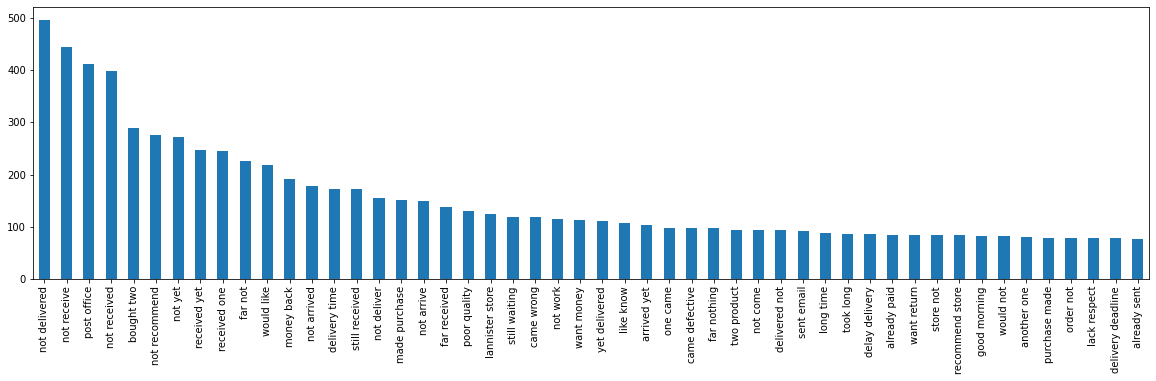

In [ ]:
DTM_bigram.sum().sort_values(ascending=False).head(50).plot.bar(figsize=(20,5)) 

In [ ]:
trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3))

In [ ]:
X_tri = trigram_count_vectorizer.fit_transform(neg_rev['clean_review'])

# Creating a DTM
DTM_trigram = pd.DataFrame(X_tri.toarray(), columns=trigram_count_vectorizer.get_feature_names())

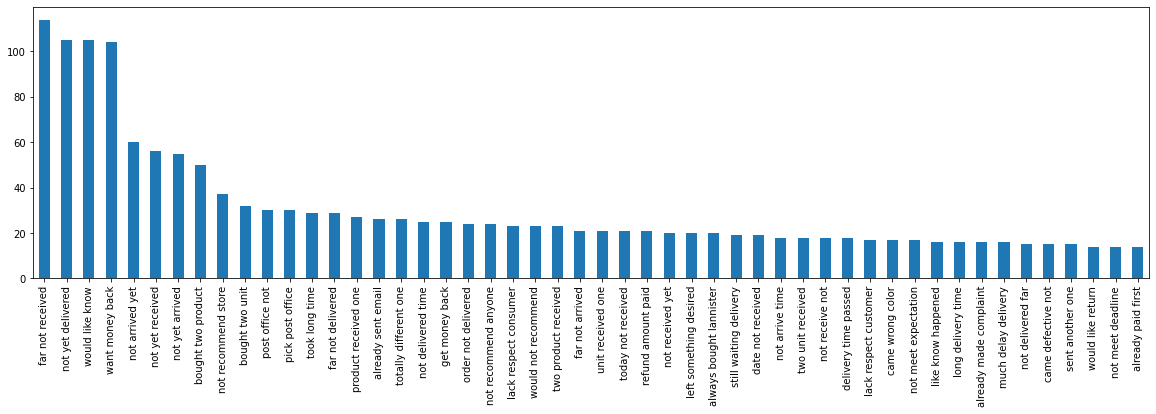

In [ ]:
DTM_trigram.sum().sort_values(ascending=False).head(50).plot.bar(figsize=(20,5)) 

In [ ]:
rev1.to_csv('review_translation.csv')

In [ ]:
rev1.shape

(100000, 9)

In [ ]:
rev1.order_id.nunique()

99441

In [ ]:
rev1.review_id.nunique()

99173